# Warming Up - DASK 병렬처리 프레임워크

---

## 참고 자료

[Welcome to the Dask Tutorial](https://tutorial.dask.org/00_overview.html)

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1
def dec(x):
    sleep(1)
    return x - 1
def add(x, y):
    sleep(1)
    return x + y

In [2]:
from dask import compute, delayed
from dask.distributed import Client, progress
client = Client(n_workers=1)

In [3]:

l = []
for i in range(10):
    a = delayed(inc)(i)
    b = delayed(dec)(i)
    c = delayed(add)(a, b)
    l.append(c)

l

[Delayed('add-058cf6fa-a532-46f8-991a-8179595c8ff6'),
 Delayed('add-c673087a-83dc-42ff-b144-56d313d98461'),
 Delayed('add-43857630-11df-4e36-9fb8-7656f3912698'),
 Delayed('add-519a414e-236a-409a-9850-8ba4d6b8841c'),
 Delayed('add-051328d3-dc31-4566-952e-fa0f10a05cad'),
 Delayed('add-570297db-9fc3-4eed-ae1c-f9374723830b'),
 Delayed('add-10cac7c6-1126-4bb6-a386-7115368f9810'),
 Delayed('add-1b9e3518-95db-452d-b2d1-daa6c0ae41f6'),
 Delayed('add-522b8662-fbb8-41ca-b2af-b6ff53119a89'),
 Delayed('add-aec759e4-a390-48be-a84b-89c4da01d474')]

In [4]:

l = compute(*l)
l

(0, 2, 4, 6, 8, 10, 12, 14, 16, 18)

# DataFrame
- Dask DataFrame - parallelized pandas
    - https://tutorial.dask.org/01_dataframe.html
- Converting a Dask DataFrame to a pandas DataFrame
    - https://coiled.io/blog/converting-a-dask-dataframe-to-a-pandas-dataframe/

In [5]:
from dask.distributed import Client

client = Client(n_workers=2)
client

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34041 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34041/status,
Dashboard: http://127.0.0.1:34041/status,Workers: 2
Total threads: 8,Total memory: 59.85 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33283,Workers: 2
Dashboard: http://127.0.0.1:34041/status,Total threads: 8
Started: Just now,Total memory: 59.85 GiB
Comm: tcp://127.0.0.1:35527,Total threads: 4
Dashboard: http://127.0.0.1:41029/status,Memory: 29.93 GiB
Nanny: tcp://127.0.0.1:38665,


In [6]:
import os
import dask

In [7]:
import dask.dataframe as dd
import pandas as pd
df = pd.DataFrame(
    {"nums": [1, 2, 3, 4, 5, 6], "letters": ["a", "b", "c", "d", "e", "f"]}
)
ddf = dd.from_pandas(df, npartitions=2)
ddf

,nums,letters
npartitions=2,,
0,int64,object
3,...,...
5,...,...


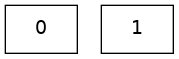

In [8]:
ddf.visualize()

In [9]:
len(ddf)

6

In [10]:
ddf.compute()

,nums,letters
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f


In [11]:
ddf["letters"].compute()

0    a
1    b
2    c
3    d
4    e
5    f
Name: letters, dtype: object

In [12]:
def df_print(x):
    # print("x : " , x)
    return x + x
    
    
ddf["letters"] = ddf["letters"].apply(df_print, meta=('letters', 'object')).compute()      
ddf["letters"].compute()

0    aa
1    bb
2    cc
3    dd
4    ee
5    ff
Name: letters, dtype: object

In [13]:
pandas_df = ddf.compute()
pandas_df

,nums,letters
0,1,aa
1,2,bb
2,3,cc
3,4,dd
4,5,ee
5,6,ff


In [14]:
client.shutdown()